In [5]:
"""
	Modified Conway's game of life to generate maps
	Initial author: IceCereal (https://github.com/IceCereal/The-Game-Of-Life)
"""

# IMPORTS
import random

# HEIGHT & WIDTH OF THE GRID
HEIGHT = 100
WIDTH = 100

# OTHER PARAMS
MAP_COUNT = 100
EPOCHS = 100

# GRID AND IT'S CORRESPONDING EQUIVALENCY VALUES
grid = [[0 for i in range(WIDTH)] for j in range(HEIGHT)]
netVals = [[0 for i in range(WIDTH)] for j in range(HEIGHT)]
heights = [[0 for i in range(WIDTH)] for j in range(HEIGHT)]

# RANGE FOR EACH CELL
lowerBound = 2
upperBound = 3

# MAIN LOOP
def updateGrid():
	# VERSION = 2.5

	# EASY VALS:
	maxColumn = WIDTH - 1
	maxRow = HEIGHT - 1

	# 4 Corners
	netVals[0][0] = grid[0][1] + grid[1][1] + grid[1][0]
	netVals[0][maxColumn] = grid[0][maxColumn-1] + grid[1][maxColumn-1] + grid[1][maxColumn]
	netVals[maxRow][maxColumn] = grid[maxRow][maxColumn-1] + grid[maxRow-1][maxColumn-1] + grid[maxRow-1][maxColumn]
	netVals[maxRow][0] = grid[maxRow][1] + grid[maxRow-1][1] + grid[maxRow-1][0]

	# Edges
	for column in range(1, maxColumn):
		netVals[0][column] = grid[0][column-1] + grid[1][column-1] + grid[1][column] + grid[1][column+1] + grid[0][column+1]
		netVals[maxRow][column] = grid[maxRow][column-1] + grid[maxRow-1][column-1] + grid[maxRow-1][column] + grid[maxRow-1][column+1] + grid[maxRow][column+1]

	for row in range(1, maxRow):
		netVals[row][0] = grid[row-1][0] + grid[row-1][1] + grid[row][1] + grid[row+1][1] + grid[row+1][0]
		netVals[row][maxColumn] = grid[row-1][maxColumn] + grid[row-1][maxColumn-1] + grid[row][maxColumn-1] + grid[row+1][maxColumn-1] + grid[row+1][maxColumn]

	# Everything in the middle
	for row in range(1, maxRow):
		for column in range(1, maxColumn):
			netVals[row][column] = grid[row-1][column-1] + grid[row-1][column] + grid[row-1][column+1] + grid[row][column+1] + grid[row+1][column+1] + grid[row+1][column] + grid[row+1][column-1] + grid[row][column-1]

	# EVALUATION METRIC
	for row in range(0, maxRow+1):
		for column in range(0, maxColumn+1):
			state = grid[row][column]

			if (state):
				if netVals[row][column] < lowerBound:
					grid[row][column] = 0

				if netVals[row][column] > upperBound:
					grid[row][column] = 0

			else:
				if (netVals[row][column] == upperBound):
					grid[row][column] = 1


startLocations = 400

for _ in range(MAP_COUNT):

	for i in range(startLocations):
		random.seed()
		valueWidth = random.randint(0, WIDTH-1)
		random.seed()
		valueHeight = random.randint(0, HEIGHT-1)
		grid[valueHeight][valueWidth] = 1


	for i in range(EPOCHS + 1):
		# print("Epoch: " + str(i))
		updateGrid()

	for row in range(0, HEIGHT):
		for column in range(0, WIDTH):
			heights[row][column] += grid[row][column]

# TODO: Gaussain smooth the heights and make a 3D map

<IPython.core.display.Javascript object>


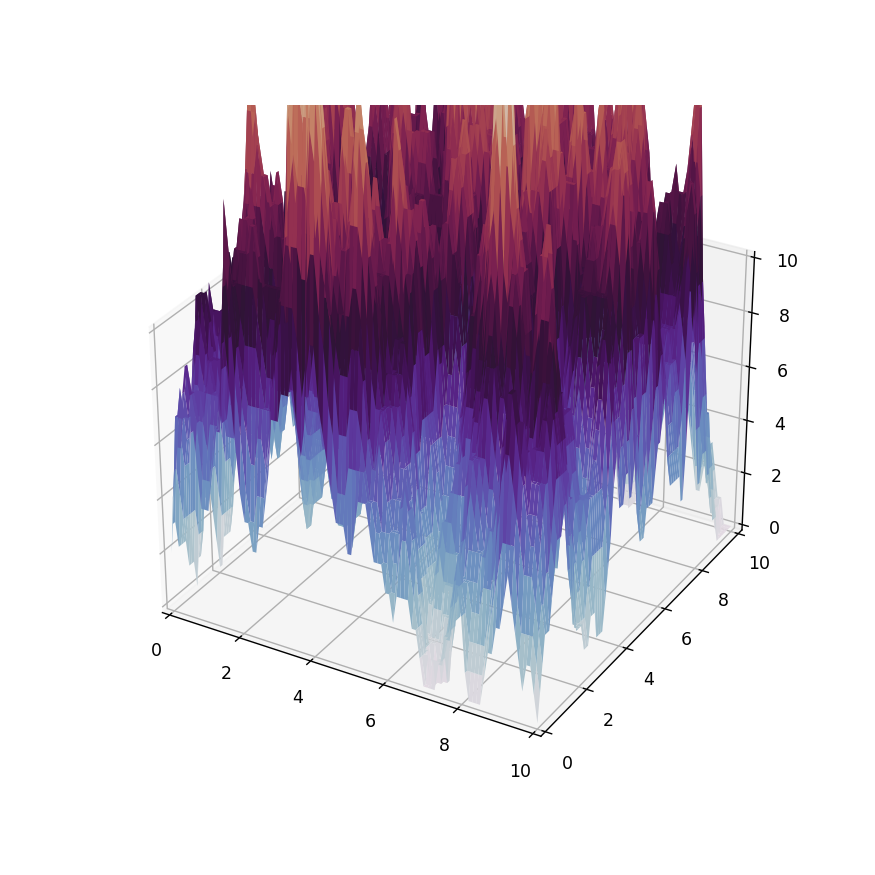

In [9]:
%matplotlib notebook

from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import mpl_toolkits
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = "3d")

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
z = []

for i in range(100):
  z.append(heights[i])
z = np.array(z)
X, Y = np.meshgrid(x, y)
# X, Z = np.meshgrid(x, z)
# Y, Z = np.meshgrid(y, z)
Z = np.array(heights)
sigma = 1
Z = gaussian_filter(Z, sigma=sigma)
# ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='twilight', edgecolor='None')
ax.set_zlim3d(0, 10)
ax.set_xlim3d(0,10)
ax.set_ylim3d(0,10)
# ax.view_init(50, 20)
plt.show()

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)